In [ ]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Show plots inline
%matplotlib inline


In [ ]:
from google.colab import files
# Run this only if needed to upload manually
# files.upload()

# Load dataset
df = pd.read_csv('hotel_bookings.csv')
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Shape
print("Shape:", df.shape)

# Info
df.info()

# Describe
df.describe(include='all')

# Check first and last 5 rows
df.head()
df.tail()

# Check data types and missing values
df.isnull().sum()


Shape: (29264, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29264 entries, 0 to 29263
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           29264 non-null  object 
 1   is_canceled                     29264 non-null  int64  
 2   lead_time                       29264 non-null  int64  
 3   arrival_date_year               29264 non-null  int64  
 4   arrival_date_month              29264 non-null  object 
 5   arrival_date_week_number        29264 non-null  int64  
 6   arrival_date_day_of_month       29264 non-null  int64  
 7   stays_in_weekend_nights         29264 non-null  int64  
 8   stays_in_week_nights            29264 non-null  int64  
 9   adults                          29264 non-null  int64  
 10  children                        29264 non-null  int64  
 11  babies                          29264 non-null  int64  
 12  meal         

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


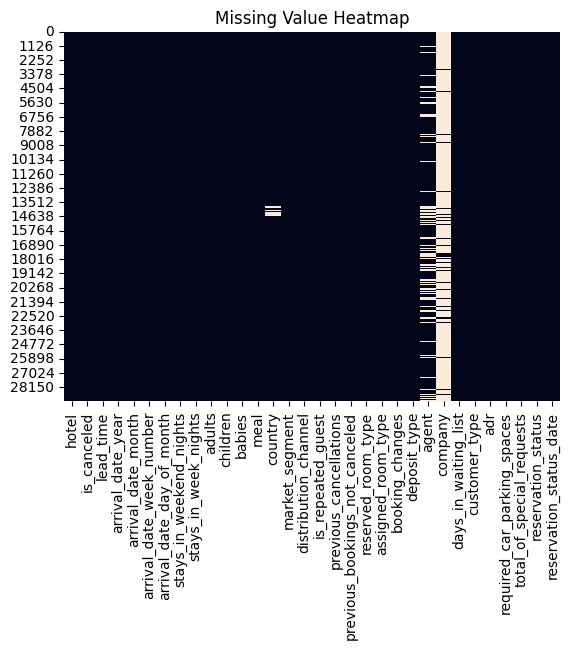

,0
country,1.575314
agent,20.649945
company,91.966238


In [ ]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

# Percentage missing
missing = (df.isnull().sum() / len(df)) * 100
missing[missing > 0]


In [ ]:
# Fill missing values
df['children'].fillna(0, inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)
df['country'].fillna('Unknown', inplace=True)


In [ ]:
# Count and remove
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicates: 5014


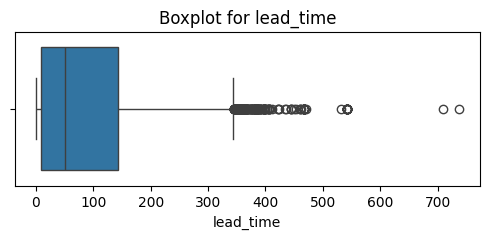

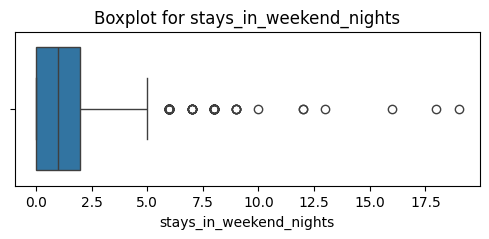

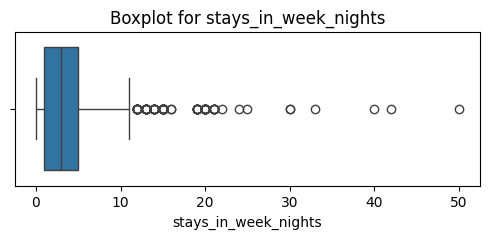

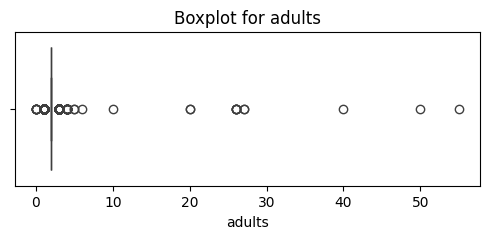

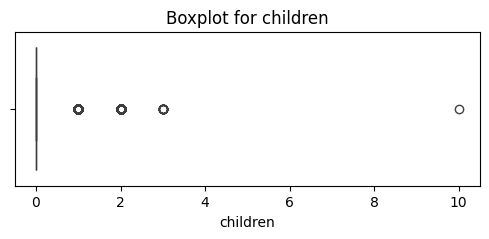

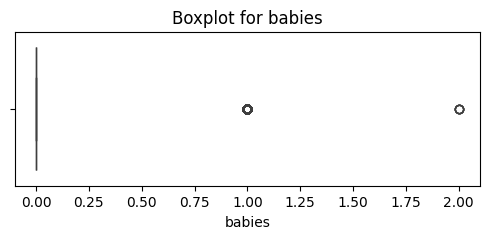

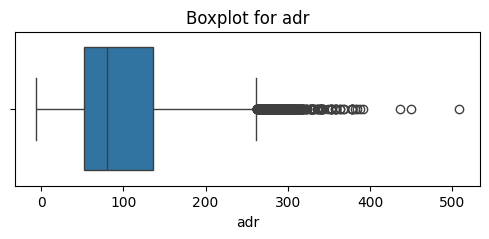

In [ ]:
# Boxplot for outliers
cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
        'adults', 'children', 'babies', 'adr']

for col in cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# IQR example for 'adr'
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['adr'] >= Q1 - 1.5 * IQR) & (df['adr'] <= Q3 + 1.5 * IQR)]


In [ ]:
# Remove rows where guests = 0
df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]

# Convert arrival date to datetime
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'] + '-' +
    df['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d')


In [ ]:
# Check date range
print(df['arrival_date'].min(), df['arrival_date'].max())

# Check unique values in categories
print(df['hotel'].unique())
print(df['meal'].unique())


2015-07-01 00:00:00 2017-08-31 00:00:00
['Resort Hotel']
['BB' 'FB' 'HB' 'SC' 'Undefined']


In [ ]:
# Export cleaned data
df.to_csv('hotel_bookings_cleaned.csv', index=False)

# Download the file
files.download('hotel_bookings_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>